Search Query Anamoly detection

In [42]:
#importing required libraries
import pandas as pd
from collections import Counter
import re

df = pd.read_csv("Queries.csv")
print(df.head())

                                 Top queries  Clicks  Impressions     CTR  \
0                number guessing game python    5223        14578  35.83%   
1                        thecleverprogrammer    2809         3456  81.28%   
2           python projects with source code    2077        73380   2.83%   
3  classification report in machine learning    2012         4959  40.57%   
4                      the clever programmer    1931         2528  76.38%   

   Position  
0      1.61  
1      1.02  
2      5.94  
3      1.28  
4      1.09  


In [2]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB 38.6 kB/s eta 0:08:14
   ---------

In [6]:
print(pl.__version__)

5.24.1


In [43]:
#exploratory data analysis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
None


In [44]:
#convert CTR column(data cleaning)
df['CTR']=df['CTR'].str.rstrip('%').astype('float')/100
df

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09
...,...,...,...,...,...
995,human activity recognition python code,48,369,0.1301,6.53
996,python contact book project,48,334,0.1437,4.92
997,why standard scaler is used,48,295,0.1627,2.07
998,credit scoring machine learning python,48,243,0.1975,6.40


C:\Users\Hello SIR\AppData\Local\Temp\ipykernel_1848\1125516374.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




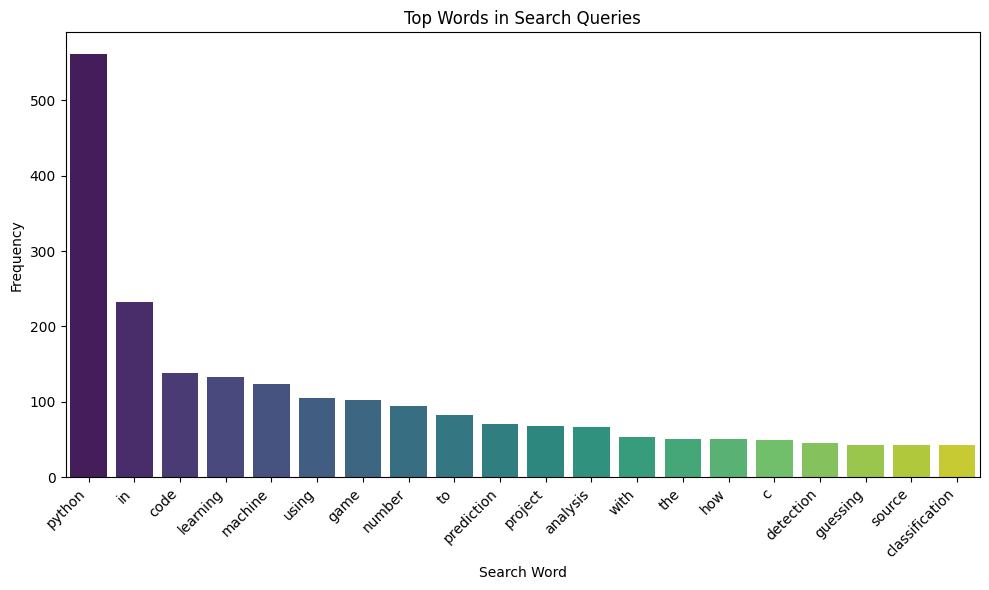

In [45]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Function to clean and split the queries into words
def clean_data(query):
    words = re.findall(r'\b[a-zA-Z]+\b', query.lower())  # Extract words
    return words

# Assuming 'df' is your DataFrame and 'Top queries' contains the search queries
word_count = Counter()

# Iterate through each query and update word counts
for query in df['Top queries']:
    word_count.update(clean_data(query))

# Convert the word count to a DataFrame for easy handling
word_frequency = pd.DataFrame(word_count.most_common(20), columns=['Word', 'Frequency'])

# Plotting with Seaborn
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
sns.barplot(x='Word', y='Frequency', data=word_frequency, palette='viridis')

# Add title and labels
plt.title('Top Words in Search Queries')
plt.xlabel('Search Word')
plt.ylabel('Frequency')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent label clipping

# Show the plot
plt.show()


In [46]:
#top queries by clicks and Impressions
top_queries_click_visits=df.nlargest(10,'Clicks')[['Top queries','Clicks']]
top_queries_impressions_visit=df.nlargest(10,'Impressions')[['Top queries','Impressions']]

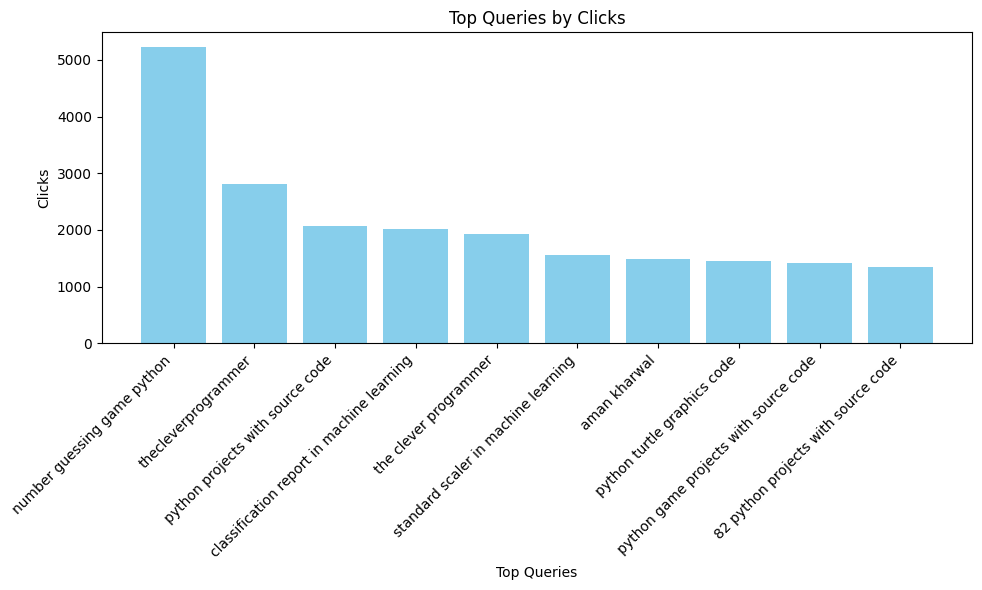

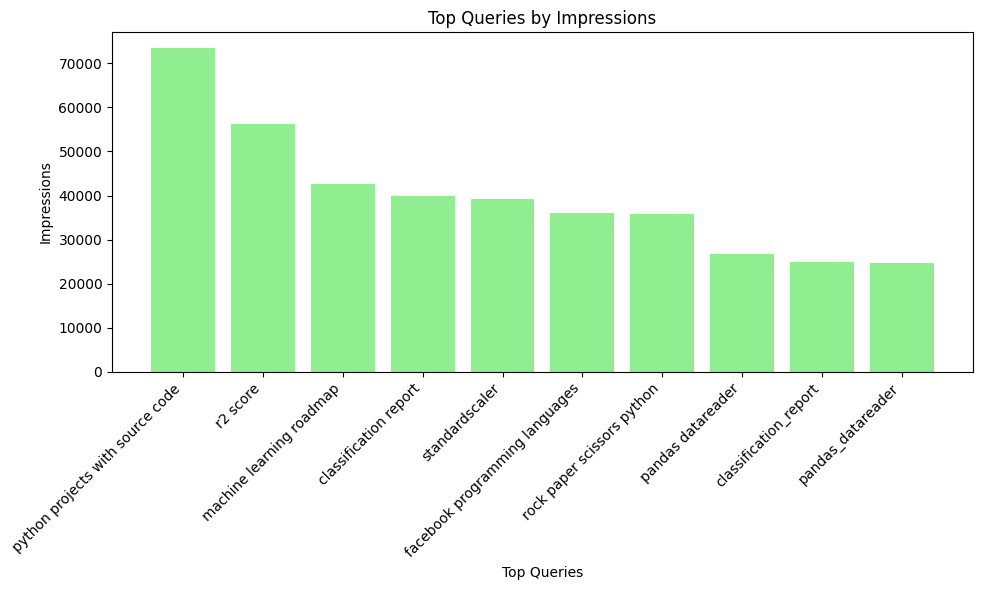

In [47]:
import matplotlib.pyplot as plt

# Plotting Top Queries by Clicks
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
plt.bar(top_queries_click_visits['Top queries'], top_queries_click_visits['Clicks'], color='skyblue')
plt.title('Top Queries by Clicks')
plt.xlabel('Top Queries')
plt.ylabel('Clicks')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent label clipping
plt.show()

# Plotting Top Queries by Impressions
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
plt.bar(top_queries_impressions_visit['Top queries'], top_queries_impressions_visit['Impressions'], color='lightgreen')
plt.title('Top Queries by Impressions')
plt.xlabel('Top Queries')
plt.ylabel('Impressions')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent label clipping
plt.show()


In [48]:
#queries with lowest and highest CTR(click through rate)
top_ctr_vis=df.nlargest(10,'CTR')[['Top queries','CTR']]
bottom_ctr_vis=df.nsmallest(10,'CTR')[['Top queries','CTR']]
print(top_ctr_vis.head())
print(bottom_ctr_vis.head())

                                         Top queries     CTR
928                         the cleverprogrammer.com  0.8548
927                        the clever programmer.com  0.8281
1                                thecleverprogrammer  0.8128
732             the clever programmer python project  0.7857
307  the clever programmer machine learning projects  0.7735
                       Top queries     CTR
929                  python turtle  0.0029
232                 standardscaler  0.0045
423  classification report sklearn  0.0047
544                standard scaler  0.0048
981               r2 score sklearn  0.0062


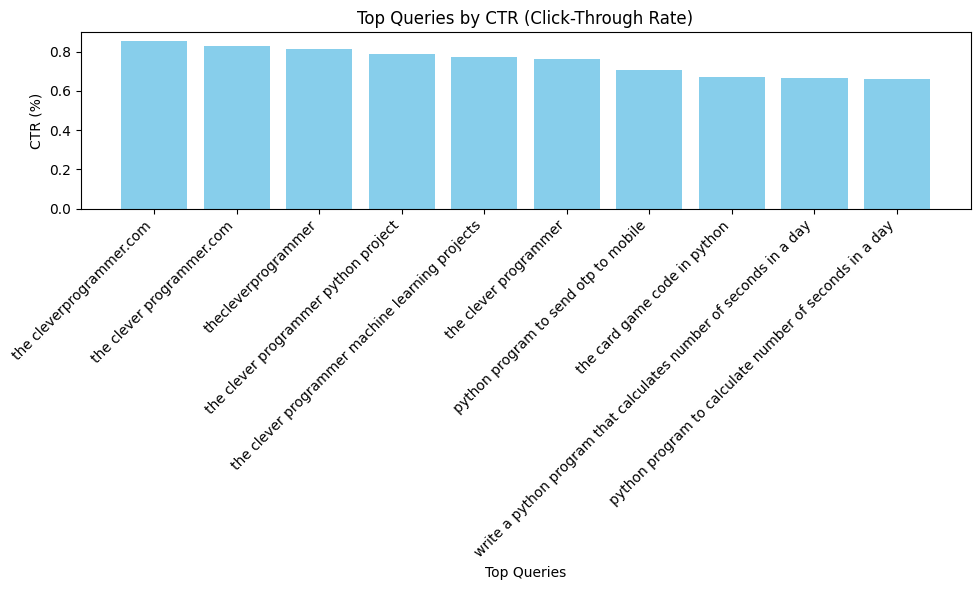

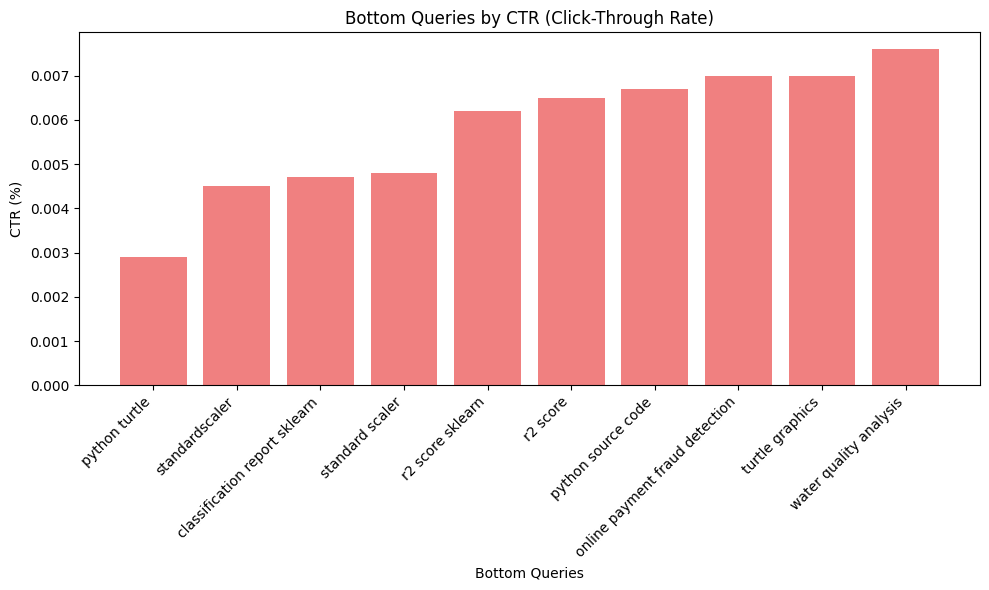

In [49]:


# Plotting Top Queries by CTR (Click-Through Rate)
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
plt.bar(top_ctr_vis['Top queries'], top_ctr_vis['CTR'], color='skyblue')
plt.title('Top Queries by CTR (Click-Through Rate)')
plt.xlabel('Top Queries')
plt.ylabel('CTR (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent label clipping
plt.show()

# Plotting Bottom Queries by CTR (Click-Through Rate)
plt.figure(figsize=(10, 6))  # Optional: Adjust the size of the figure
plt.bar(bottom_ctr_vis['Top queries'], bottom_ctr_vis['CTR'], color='lightcoral')
plt.title('Bottom Queries by CTR (Click-Through Rate)')
plt.xlabel('Bottom Queries')
plt.ylabel('CTR (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Prevent label clipping
plt.show()


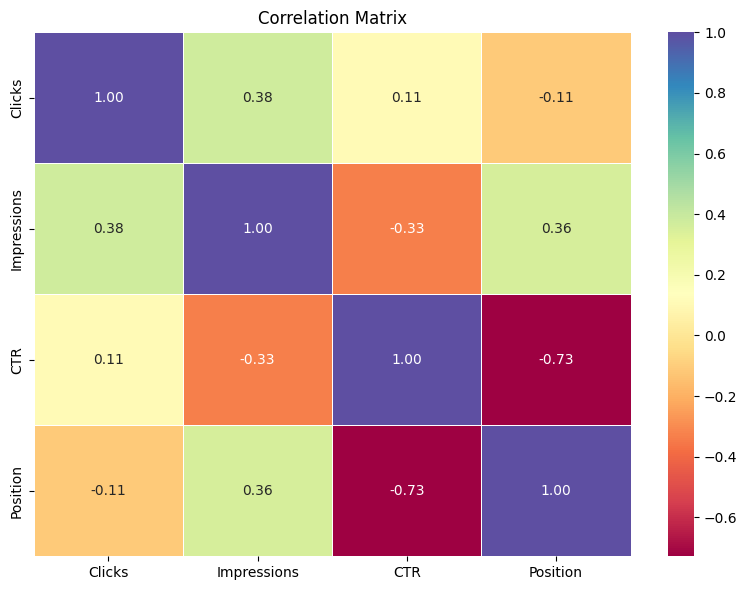

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

# Plotting the correlation matrix as a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Adjust the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt='.2f', cbar=True, linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix')
plt.tight_layout()  # Prevent label clipping
plt.show()


Detecting Anomalies in Search Queries

In [51]:
#Isolation Forest algorithm
from sklearn.ensemble import IsolationForest

#selecting relevant features
features=df[['Clicks','Impressions','CTR','Position']]

#Initializing Isolation Forest
iso_forest=IsolationForest(n_estimators=100,contamination=0.01) # contanimation= expected proportion of outliers

#Fitting the model
iso_forest.fit(features)

#predicting anomalies
df['anomaly']=iso_forest.predict(features)

#Filtering out the anomalies
anomalies=df[df['anomaly']==-1]


In [52]:
print(anomalies[['Top queries','Clicks','Impressions','CTR','Position']])

                         Top queries  Clicks  Impressions     CTR  Position
0        number guessing game python    5223        14578  0.3583      1.61
1                thecleverprogrammer    2809         3456  0.8128      1.02
2   python projects with source code    2077        73380  0.0283      5.94
4              the clever programmer    1931         2528  0.7638      1.09
11                 clever programmer    1243        21566  0.0576      4.82
15        rock paper scissors python    1111        35824  0.0310      7.19
21             classification report     933        39896  0.0234      7.53
34          machine learning roadmap     708        42715  0.0166      8.97
82                          r2 score     367        56322  0.0065      9.33
91    facebook programming languages     346        36055  0.0096      1.58


The anomalies in search query data are not merely outliers but key indicators of emerging trends, growth opportunities, and areas requiring optimization. These anomalies reflect increasing interest or shifts in user behavior, which can guide strategic decisions to enhance website relevance and user engagement. By staying responsive to these trends, websites can capitalize on new opportunities and improve their overall performance.